<a href="https://colab.research.google.com/github/M-H-Amini/NerualNetworks-TA-2021/blob/main/NNTA_Lec4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In The Name Of ALLAH
# Neural Networks TA
# Lecture 4 - Convolutional Neural Networks (CNNs)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

#  Dataset

In [8]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
Xtrain = np.expand_dims(Xtrain / 127.5 - 1, -1)
Xtest = np.expand_dims(Xtest / 127.5 - 1, -1)

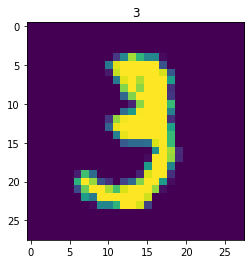

In [14]:
def show(X, y):
  plt.figure()
  plt.imshow(X[:, :, 0])
  plt.title(f'{y}')
  plt.show()

show(Xtrain[10], ytrain[10])

#  Neural Network

In [15]:
model = Sequential()
model.add(Conv2D(32, 3, 1, 'same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, 3, 1, 'same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, 3, 1, 'same', activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(10, 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
model.fit(Xtrain, ytrain, batch_size=64, validation_data=(Xtest, ytest), epochs=10)

Epoch 1/10
938/938 [==============================] - 37s 4ms/step - loss: 0.3774 - acc: 0.8895 - val_loss: 0.0503 - val_acc: 0.9850
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0435 - acc: 0.9869 - val_loss: 0.0345 - val_acc: 0.9888
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0333 - val_acc: 0.9888
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0218 - acc: 0.9922 - val_loss: 0.0277 - val_acc: 0.9915
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0158 - acc: 0.9946 - val_loss: 0.0197 - val_acc: 0.9930
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0122 - acc: 0.9958 - val_loss: 0.0223 - val_acc: 0.9932
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0098 - acc: 0.9966 - val_loss: 0.0248 - val_acc: 0.9920
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0